<a href="https://colab.research.google.com/github/Pbartuiyot/mlearn/blob/main/african_credit_default_cap_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# African Credit Scoring Challenge: Can you predict the likelihood of a customer defaulting on a loan based on their financial data?
Financial institutions need to predict loan defaults to mitigate risk and optimise lending decisions. In Africa’s rapidly growing financial markets, with diverse customer demographics and dynamic economic conditions, accurately assessing default risk is more important than ever.

In this challenge, we want you to develop a robust, generalisable machine learning model to predict the likelihood of loan defaults for both existing customers and new applicants. Beyond accurate predictions, we encourage yous to innovate by incorporating unique factors relevant to each financial market.

The objective of this challenge is to develop a machine learning model that accurately predicts the probability of loan default.

The top 10 winners, in addition to submitting their solution, will need to design and submit a credit scoring function, using their model's outputs and probabilities. This step involves binning model outputs into risk categories and proposing a scalable credit risk score.

By accurately predicting loan defaults, your work will enable the client organisation to create a credit scoring solution to evaluate risk more effectively, improving decisionmaking, reducing financial losses associated with high-risk lending, and allowing for expansion into new financial markets.

The challenge provider is a private asset manager that operates in several financial markets across Africa.

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect the data

In [6]:
# Loading the train dataset
train = pd.read_csv('Train.csv')

# Loading the test dataser
test = pd.read_csv('Test.csv')

# Display the first few rows of the datasets and their shape
display("Train", train.head(), train.shape, "Test", test.head(), test.shape)

'Train'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671.0,Kenya,248032.0,267278.0,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7.0,Repeat Loan,120.85,0.014305,121.0,0.0
1,ID_248919228515267278,248919.0,Kenya,228515.0,267278.0,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7.0,Repeat Loan,7768.50,0.300000,7794.0,0.0
2,ID_308486370501251804,308486.0,Kenya,370501.0,251804.0,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7.0,Repeat Loan,1380.00,0.200000,1428.0,0.0
3,ID_266004285009267278,266004.0,Kenya,285009.0,267278.0,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7.0,Repeat Loan,2687.40,0.300000,2770.0,0.0
4,ID_253803305312267278,253803.0,Kenya,305312.0,267278.0,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7.0,Repeat Loan,1369.20,0.300000,1418.0,0.0


(32770, 16)

'Test'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


(18594, 15)

From this data, I can observe that the training dataset `train` has a target variable (or label) indicating whether a customer defaulted or not. The test dataset `test` does not have this column since it is used to make predictions.



In [7]:
# Check column types & missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           32770 non-null  object 
 1   customer_id                  32769 non-null  float64
 2   country_id                   32769 non-null  object 
 3   tbl_loan_id                  32769 non-null  float64
 4   lender_id                    32769 non-null  float64
 5   loan_type                    32769 non-null  object 
 6   Total_Amount                 32769 non-null  float64
 7   Total_Amount_to_Repay        32769 non-null  float64
 8   disbursement_date            32769 non-null  object 
 9   due_date                     32769 non-null  object 
 10  duration                     32769 non-null  float64
 11  New_versus_Repeat            32769 non-null  object 
 12  Amount_Funded_By_Lender      32769 non-null  float64
 13  Lender_portion_F

Cleaning the Train Dataset

In [8]:
# Check for missing values in the train dataset and print
print(train.isnull().sum())
print(f"There are {train.isnull().sum().sum()} missing values in the data.")

ID                             0
customer_id                    1
country_id                     1
tbl_loan_id                    1
lender_id                      1
loan_type                      1
Total_Amount                   1
Total_Amount_to_Repay          1
disbursement_date              1
due_date                       1
duration                       1
New_versus_Repeat              1
Amount_Funded_By_Lender        1
Lender_portion_Funded          1
Lender_portion_to_be_repaid    1
target                         1
dtype: int64
There are 15 missing values in the data.


### Exploratory Data Analysis

In [9]:
# Features
train.describe()

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,32769.000000,32769.000000,32769.000000,3.276900e+04,3.276900e+04,32769.000000,3.276900e+04,32769.000000,3.276900e+04,32769.000000
mean,254467.760688,262930.535598,266435.559004,1.396780e+04,1.464219e+04,8.590650,2.566417e+03,0.217733,2.679485e+03,0.019256
std,26225.835272,39260.082377,3559.969589,6.749081e+04,7.647774e+04,14.947135,1.382252e+04,0.130120,1.558905e+04,0.137426
min,145.000000,102041.000000,245684.000000,5.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,248966.000000,233926.000000,267278.000000,2.280000e+03,2.318000e+03,7.000000,2.280000e+02,0.110795,2.330000e+02,0.000000
50%,255430.000000,260262.000000,267278.000000,5.249000e+03,5.324000e+03,7.000000,9.015000e+02,0.300000,9.220000e+02,0.000000
75%,262388.000000,286921.000000,267278.000000,1.149900e+04,1.169500e+04,7.000000,2.260200e+03,0.300000,2.307000e+03,0.000000
max,312737.000000,375319.000000,267278.000000,4.000000e+06,4.600000e+06,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


In [10]:
test.describe()

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
count,18594.000000,18594.000000,18594.000000,1.859400e+04,1.859400e+04,18594.000000,18594.000000,18594.000000,18594.000000
mean,262489.507207,282416.633538,271876.749274,1.446507e+04,1.578416e+04,13.530763,2278.430133,0.207090,2466.451967
std,28957.312848,52907.548852,12349.646095,1.569085e+05,1.871893e+05,36.437325,6784.429774,0.122085,7680.081817
min,6083.000000,104034.000000,245684.000000,5.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,250357.000000,240880.500000,267278.000000,2.101900e+03,2.164480e+03,7.000000,239.360000,0.131313,244.035000
50%,259107.000000,273442.500000,267278.000000,4.740000e+03,4.828000e+03,7.000000,744.575000,0.300000,758.920000
75%,270051.250000,304856.000000,267278.000000,1.026775e+04,1.056757e+04,7.000000,1998.000000,0.300000,2041.000000
max,312696.000000,375320.000000,297183.000000,2.000000e+07,2.415284e+07,849.000000,400000.000000,1.000000,423400.000000


#### TARGET EXPLORATION

target
0.0    32138
1.0      631
Name: count, dtype: int64


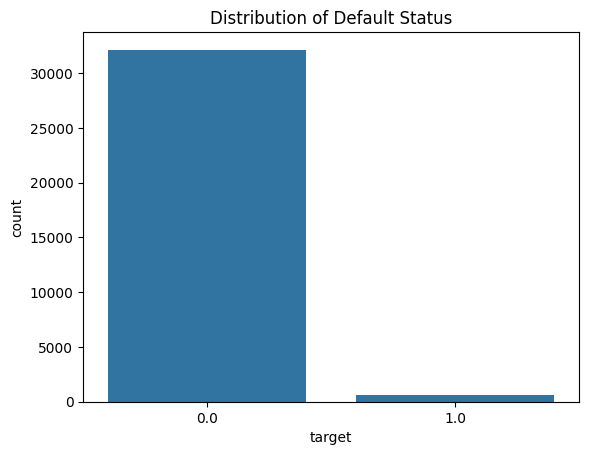

In [11]:
# Exploring target variable distribution
print(train['target'].value_counts())
sns.countplot(x='target', data=train)
plt.title('Distribution of Default Status')
plt.show()

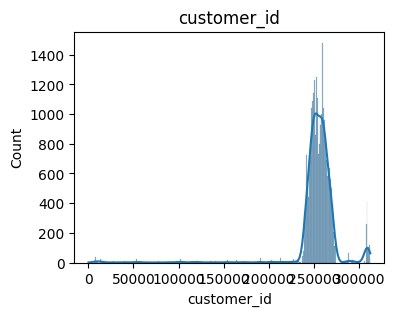

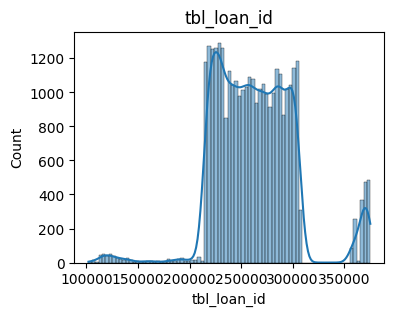

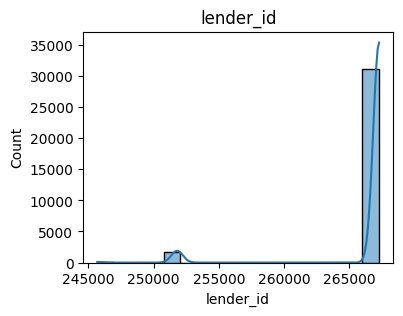

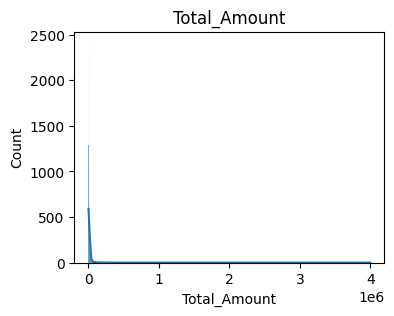

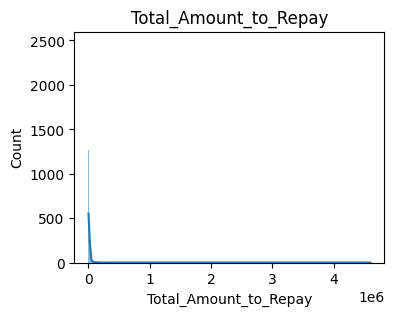

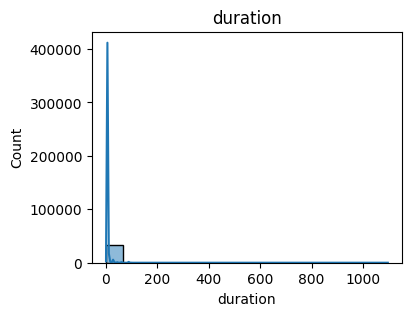

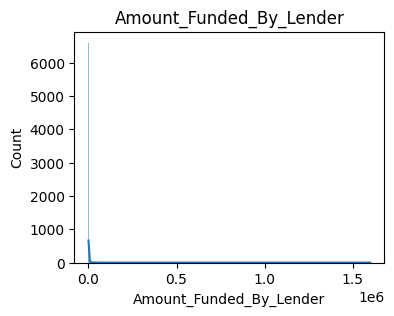

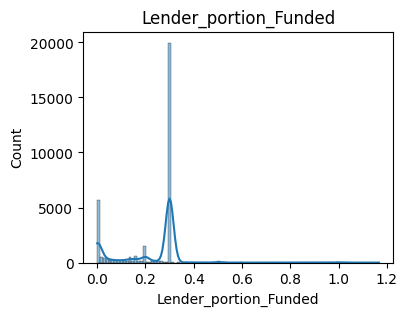

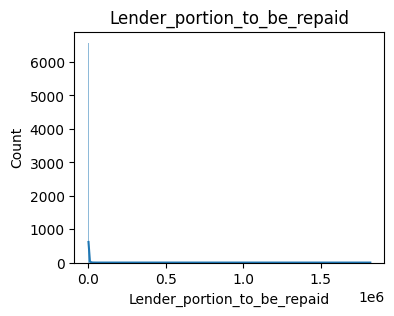

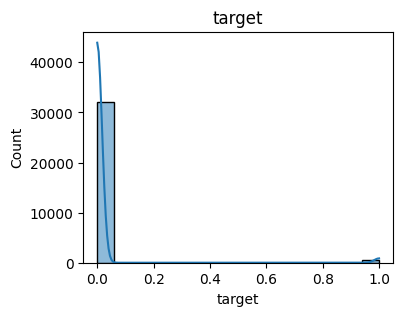

In [12]:
# Explore numerical features
numerical_features = train.select_dtypes(include=np.number).columns.tolist()
for feature in numerical_features:
  plt.figure(figsize=(4, 3))
  sns.histplot(train[feature], kde=True)
  plt.title(f'{feature}')
  plt.show()

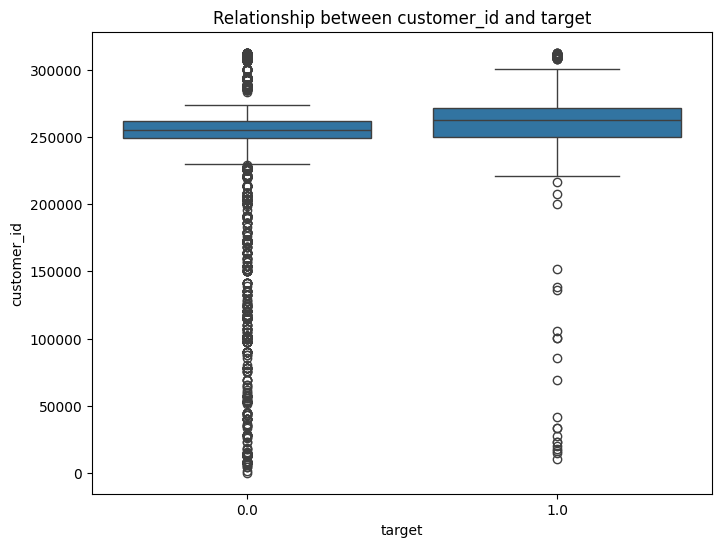

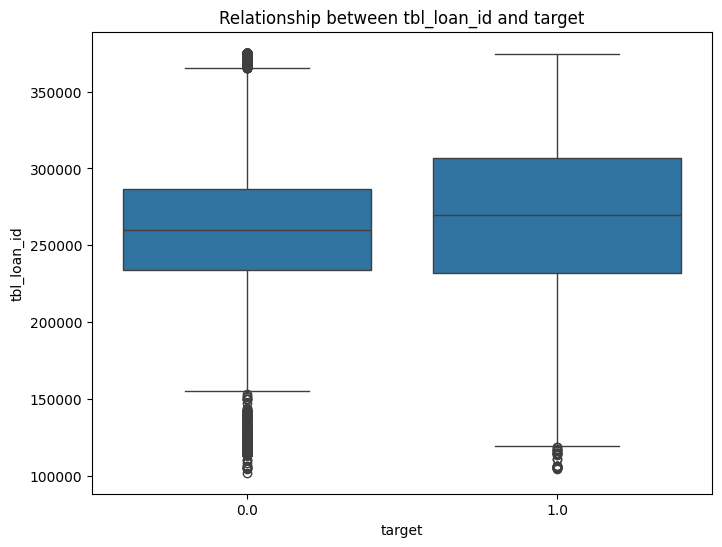

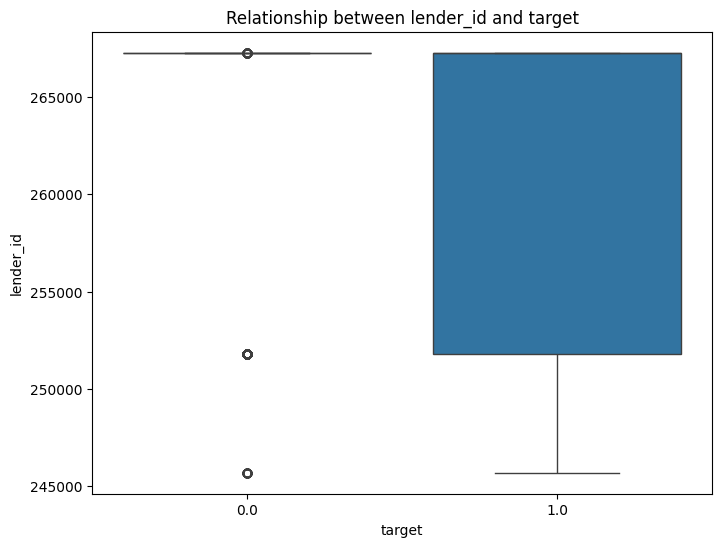

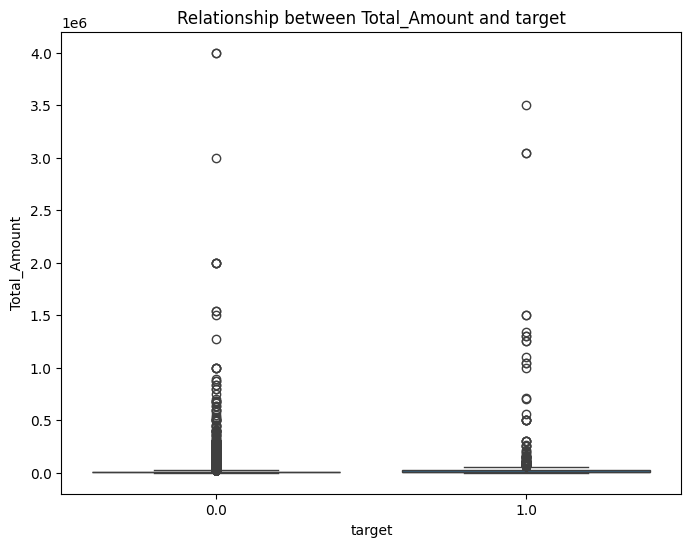

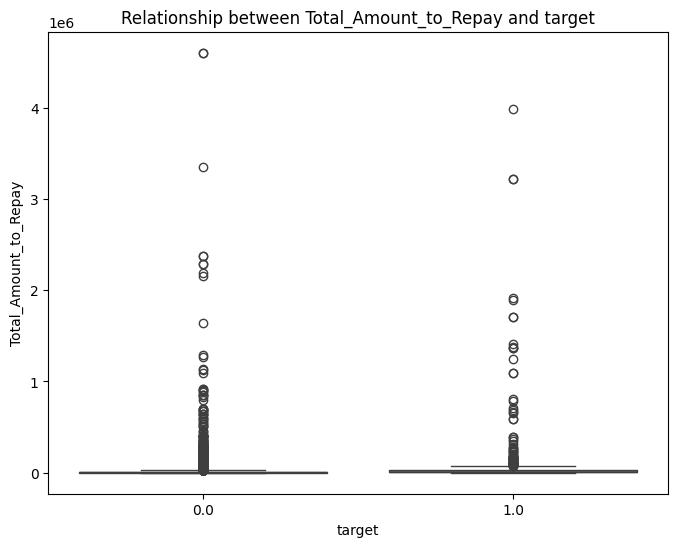

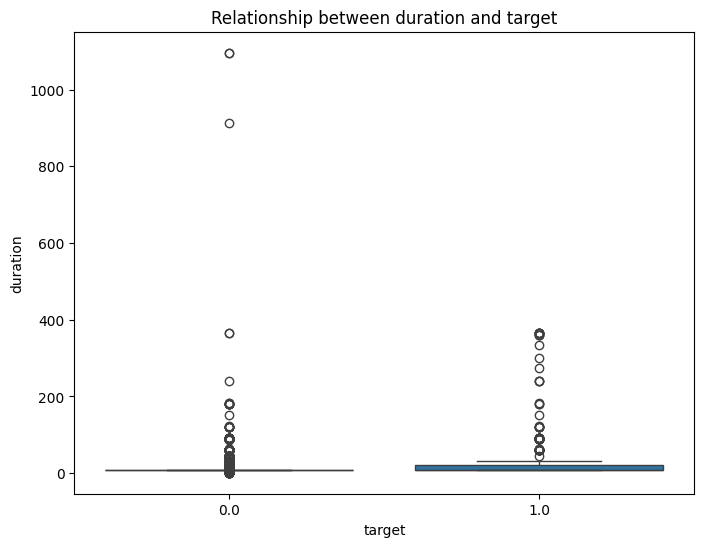

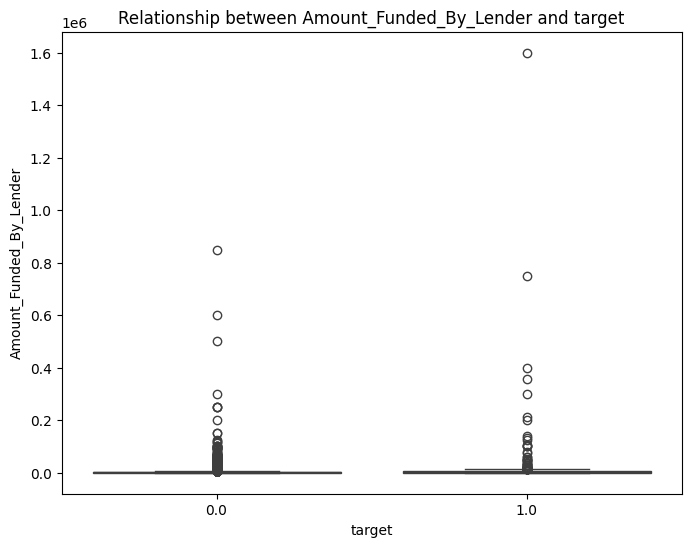

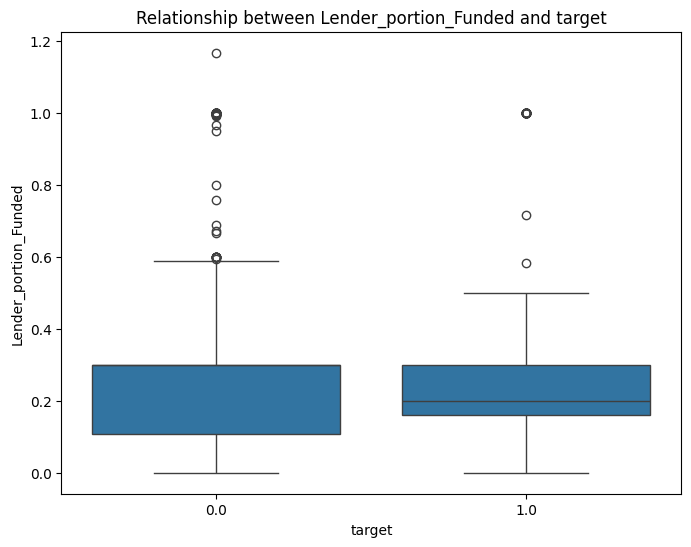

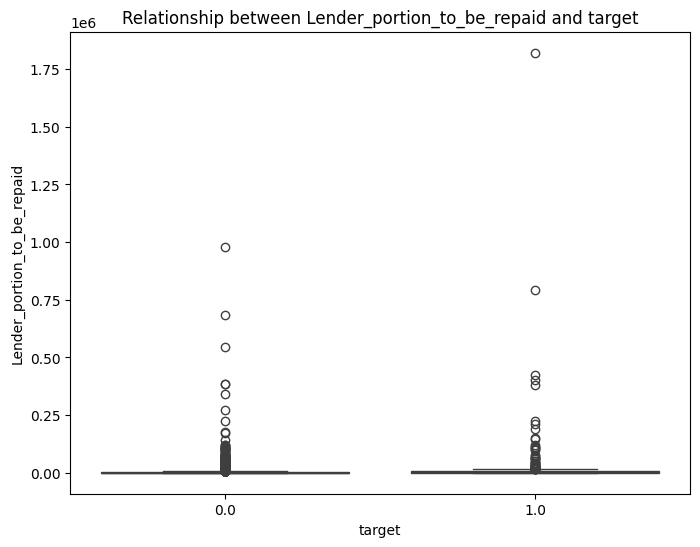

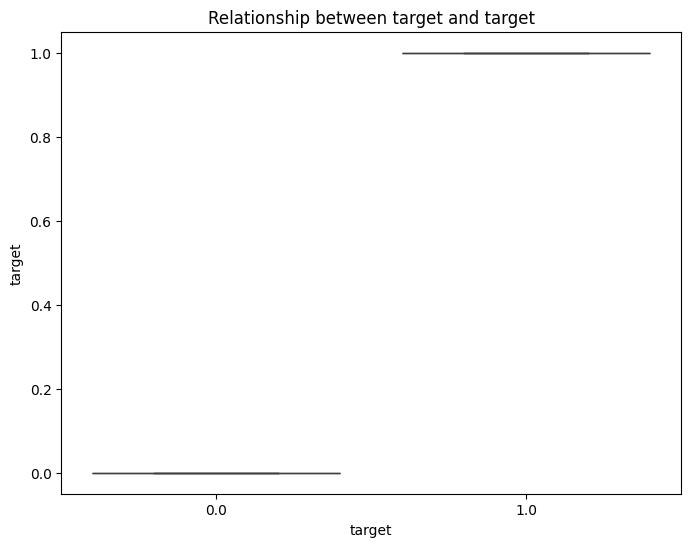

NameError: name 'categorical_features' is not defined

In [13]:
# Analyze relationships between features and target variable
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  # Use train DataFrame which contains 'default_status' column
  # The error was caused because the DataFrame used within the boxplot function
  # did not contain a 'default_status' column.
  # By changing 'train' to 'train_df', we make sure to use the DataFrame
  # that was specifically created to include 'default_status' (after merging and processing).
  sns.boxplot(x='target', y=feature, data=train)
  plt.title(f'Relationship between {feature} and target')
  plt.show()

for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  # Similarly, use train_df for this plot as well
  sns.countplot(x=feature, hue='target', data=train)
  plt.title(f'Relationship between {feature} and target')
  plt.xticks(rotation=45)
  plt.show()

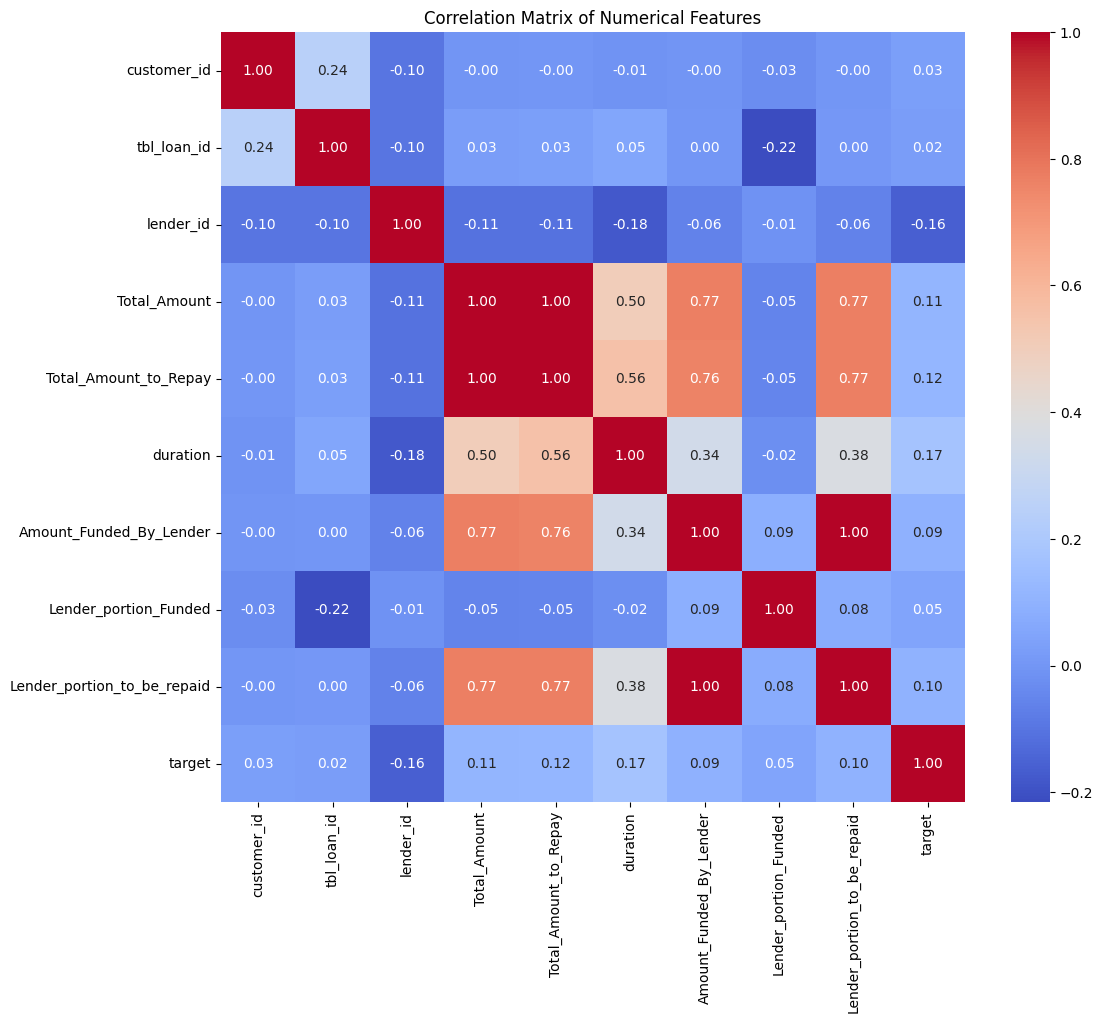

In [14]:
# Correlation matrix for numerical features
correlation_matrix = train[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Categorical exploration

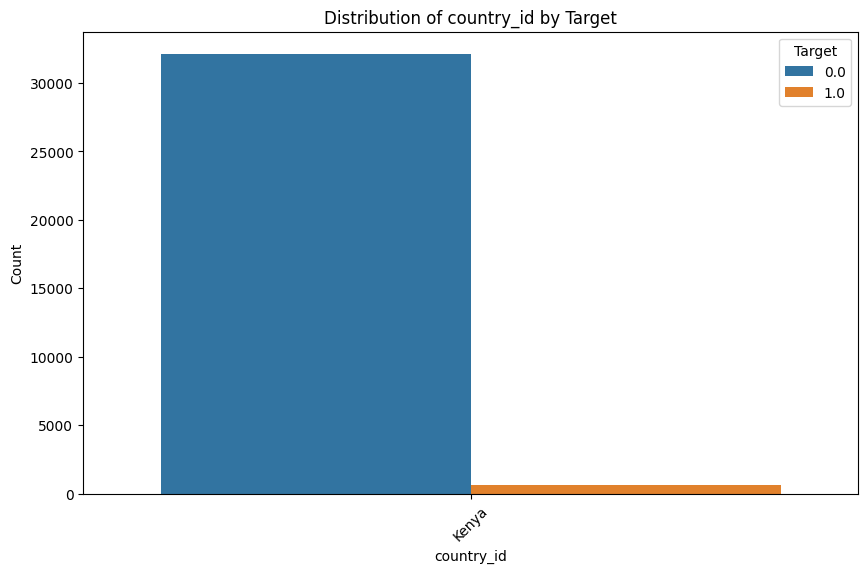

In [19]:
plot_categorical(train, 'country_id')

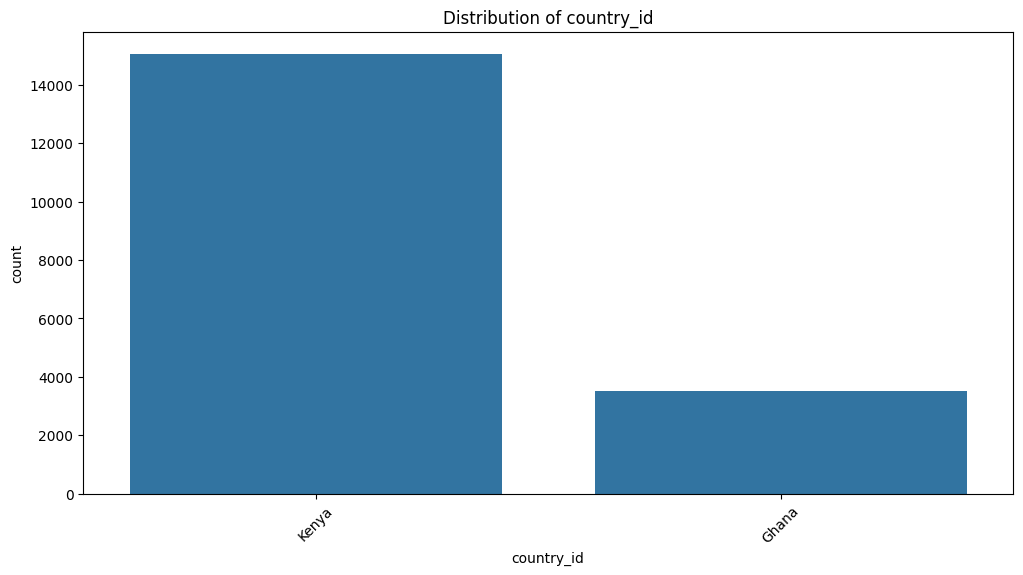

In [30]:
def plot_categorical(df, col):
  """Plots the distribution of a categorical feature.

  Args:
    df: The pandas DataFrame.
    col: The name of the categorical feature column.
  """
  plt.figure(figsize=(12, 6))
  sns.countplot(x=col, data=df)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45)
  plt.show()

plot_categorical(test, 'country_id')

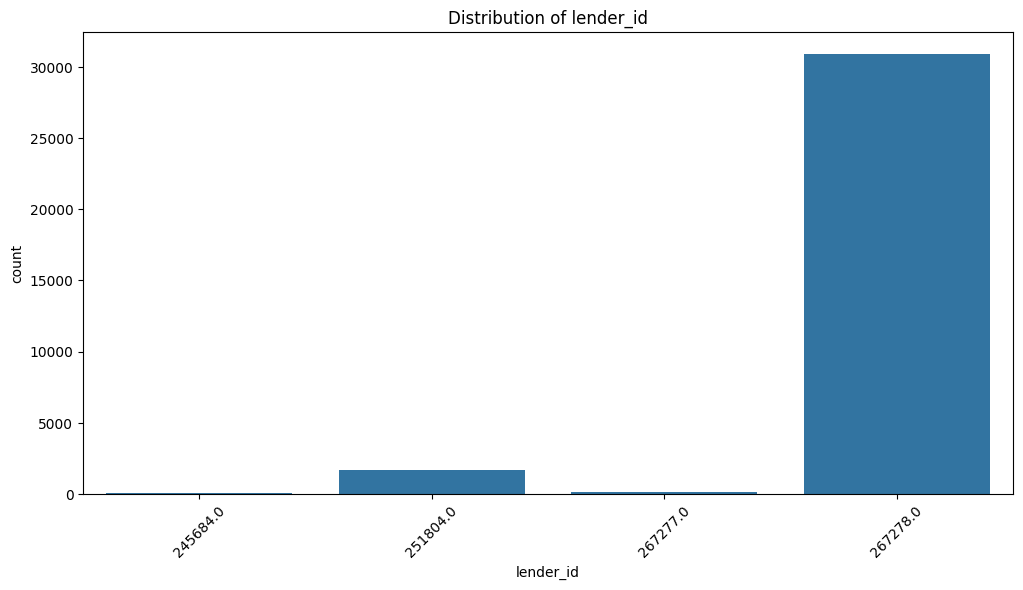

In [31]:
plot_categorical(train, 'lender_id')

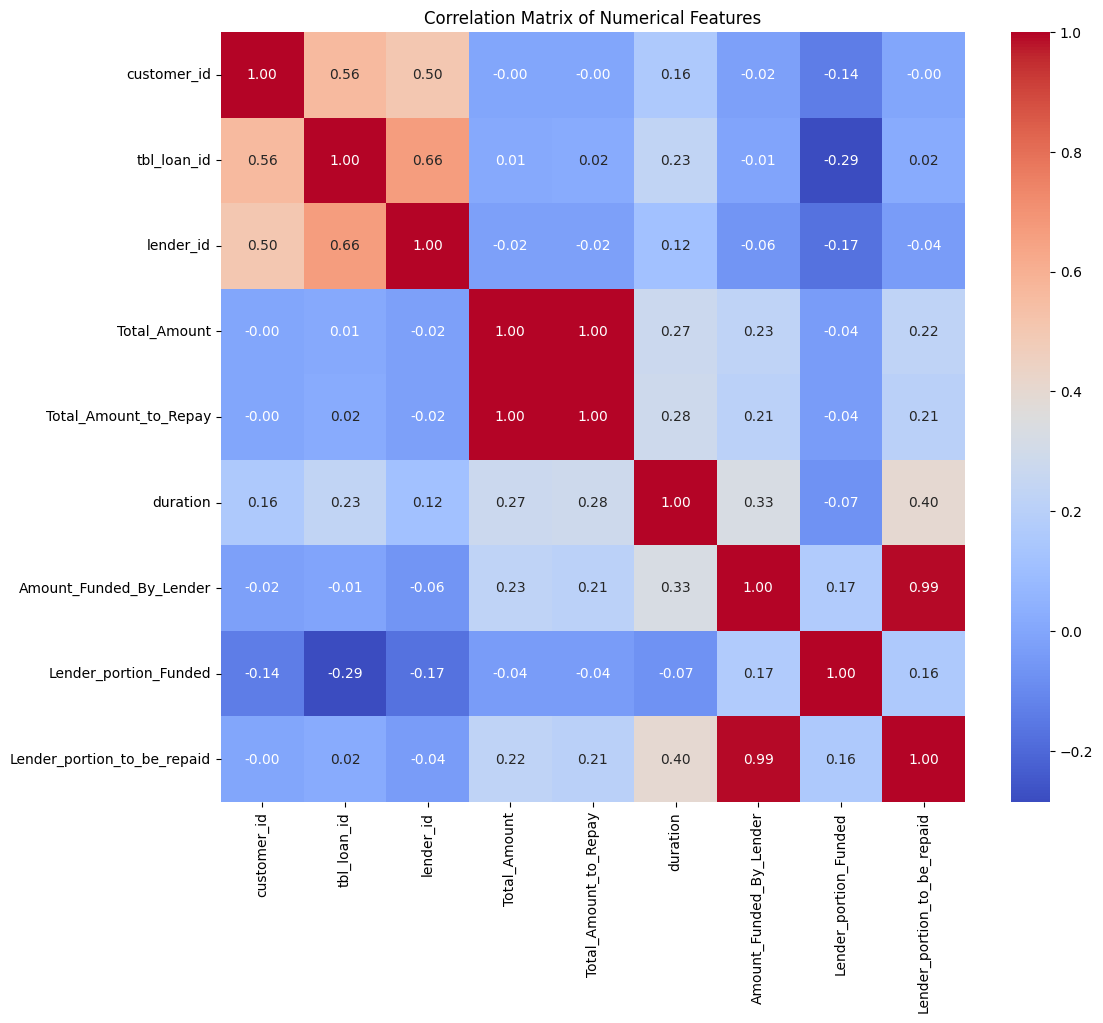

In [32]:
# Correlation matrix for numerical features test
numerical_features = [col for col in numerical_features if col in test.columns]

correlation_matrix = test[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

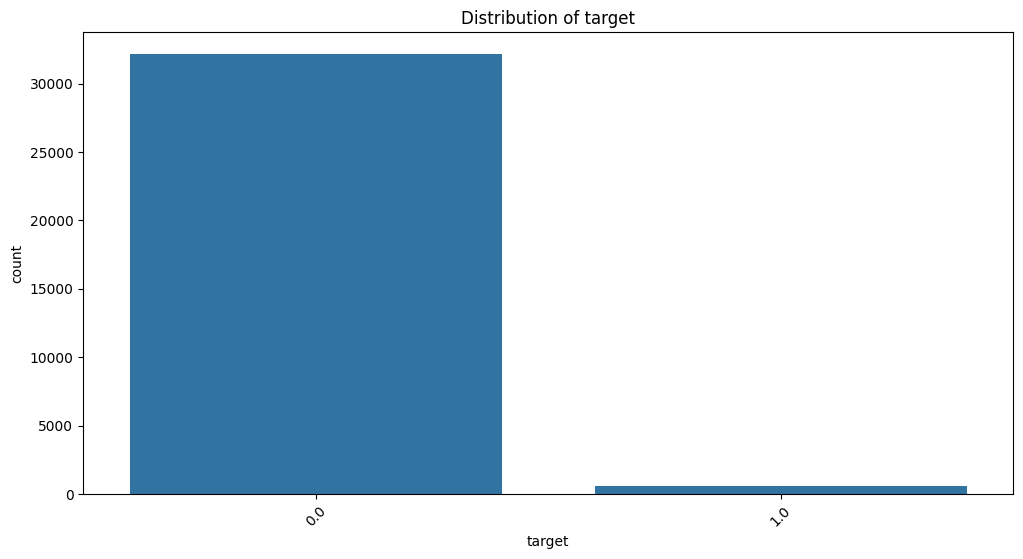

In [33]:
plot_categorical(train, 'target')

### CONTINUOUS COLUMN EXPLORATION

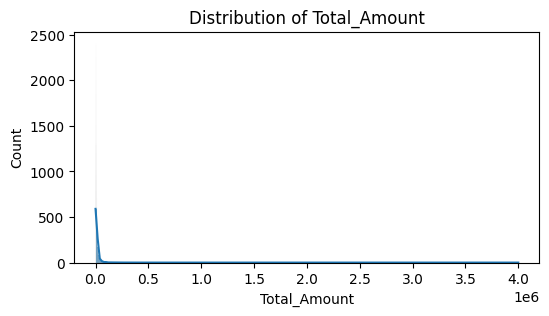

In [39]:
def plot_continuous(df, col):
  """Plots the distribution of a continuous feature.

  Args:
    df: The pandas DataFrame.
    col: The name of the continuous feature column.
  """
  plt.figure(figsize=(6, 3))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

plot_continuous(train, 'Total_Amount')

Are those outliers?
##### You can explore more of the given numerical columns as well

### Feature Engineering
Concatenate both the train and test so that we can do the processing once instead of repeating for each

In [51]:
data = pd.concat([train, test]).reset_index(drop=True)

# Convert the datetime columns appropriately
date_cols = ['disbursement_date', 'due_date']
for col in date_cols:
    data[col] = pd.to_datetime(data[col])
    # Extract month, day, and year from the date columns
    data[col+'_month'] = data[col].dt.month
    data[col+'_day'] = data[col].dt.day
    data[col+'_year'] = data[col].dt.year

# Select all categorical columns from the dataset and label encode them or one hot encode
cat_cols = data.select_dtypes(include='object').columns
num_cols = [col for col in data.select_dtypes(include='number').columns if col not in ['target']]
print(f"The categorical columns are: {cat_cols}.")
print("-"* 100)
print(f"The numerical columns are: {num_cols}")
print("-"* 100)
# we are going to one  hot encode the loan type
data = pd.get_dummies(data, columns=['loan_type'], prefix='loan_type', drop_first=False)
# Convert all the columns with prefix loan_type_ to 0/1 instead of False/True
loan_type_cols = [col for col in data.columns if col.startswith('loan_type_')]
data[loan_type_cols] = data[loan_type_cols].astype(int)

# Label-encoding for the other remaining categorical columns
le = LabelEncoder()
for col in [col for col in cat_cols if col not in ['loan_type', 'ID']]:
    data[col] = le.fit_transform(data[col])


# deal with numerical columns: we saw loan amount is  highly right skewed for this we can log transform it
data['Total_Amount'] = np.log1p(data['Total_Amount']) # study other numerical columns and see if they are skewed as well

# Splitting the data back into train and test
train_df = data[data['ID'].isin(train['ID'].unique())]

test_df = data[data['ID'].isin(test['ID'].unique())]

# we are also going to drop the country id as we saw we have only one country in train
features_for_modelling = [col for col in train_df.columns if col not in date_cols + ['ID', 'target', 'country_id']]

# Check if the new datasets have the same rows as train and test datasets
print(f"The shape of train_df is: {train_df.shape}")
print(f"The shape of test_df is: {test_df.shape}")
print(f"The shape of train is: {train.shape}")
print(f"The shape of test is: {test.shape}")
print(f"The features for modelling are:\n{features_for_modelling}")


The categorical columns are: Index(['ID', 'country_id', 'loan_type', 'New_versus_Repeat'], dtype='object').
----------------------------------------------------------------------------------------------------
The numerical columns are: ['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'due_date_month', 'due_date_day', 'due_date_year']
----------------------------------------------------------------------------------------------------
The shape of train_df is: (68654, 45)
The shape of test_df is: (18594, 45)
The shape of train is: (68654, 16)
The shape of test is: (18594, 15)
The features for modelling are:
['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_

### CROSS VALIDATION
* Here we are going to use a simple train test split but due to the imbalance try other robust methods like StratifiedKFold


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_df[features_for_modelling], train['target'], stratify=train['target'], shuffle=True, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(51490, 40) (17164, 40) (51490,) (17164,)


In [56]:
# Define the number of folds for cross-validation
n_splits = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store results for each fold
f1_scores = []
roc_auc_scores = []

# Iterate through the folds
for train_index, valid_index in skf.split(train_df[features_for_modelling], train['target']):
    # Split data into training and validation sets for the current fold
    X_train_fold, X_valid_fold = train_df[features_for_modelling].iloc[train_index], train_df[features_for_modelling].iloc[valid_index]
    y_train_fold, y_valid_fold = train['target'].iloc[train_index], train['target'].iloc[valid_index]

    # Train your model (e.g., Logistic Regression) on the training data of the current fold
    model = LogisticRegression()
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation data of the current fold
    y_pred_fold = model.predict(X_valid_fold)

    # Calculate evaluation metrics for the current fold
    f1 = f1_score(y_valid_fold, y_pred_fold)
    roc_auc = roc_auc_score(y_valid_fold, y_pred_fold)

    # Store the results for the current fold
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)


# Calculate the average F1 score and ROC AUC across all folds
average_f1 = np.mean(f1_scores)
average_roc_auc = np.mean(roc_auc_scores)

print(f"Average F1 Score: {average_f1:.4f}")
print(f"Average ROC AUC Score: {average_roc_auc:.4f}")

Average F1 Score: 0.0642
Average ROC AUC Score: 0.5169


## Initialisation & Model Training

F1 Score: 0.2615
ROC AUC Score: 0.9285

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     16849
           1       0.16      0.80      0.26       315

    accuracy                           0.92     17164
   macro avg       0.58      0.86      0.61     17164
weighted avg       0.98      0.92      0.94     17164



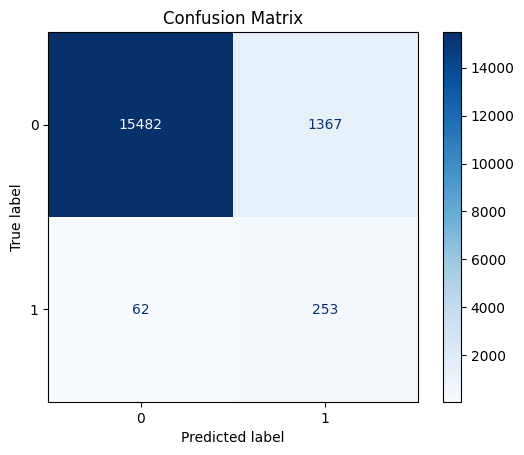

In [57]:

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Logistic Regression Classifier
clf = LogisticRegression(
    random_state=42,
    class_weight="balanced",  # Handle class imbalance
)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_valid_scaled)
y_pred_proba = clf.predict_proba(X_valid_scaled)[:, 1]

# Evaluation Metrics
f1 = f1_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred_proba)

print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_valid, y_pred))

# Confusion Matrix
# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_predictions(
    y_valid,
    y_pred,
    display_labels=clf.classes_,
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix")
plt.show()


### FEATURE IMPORTANCE

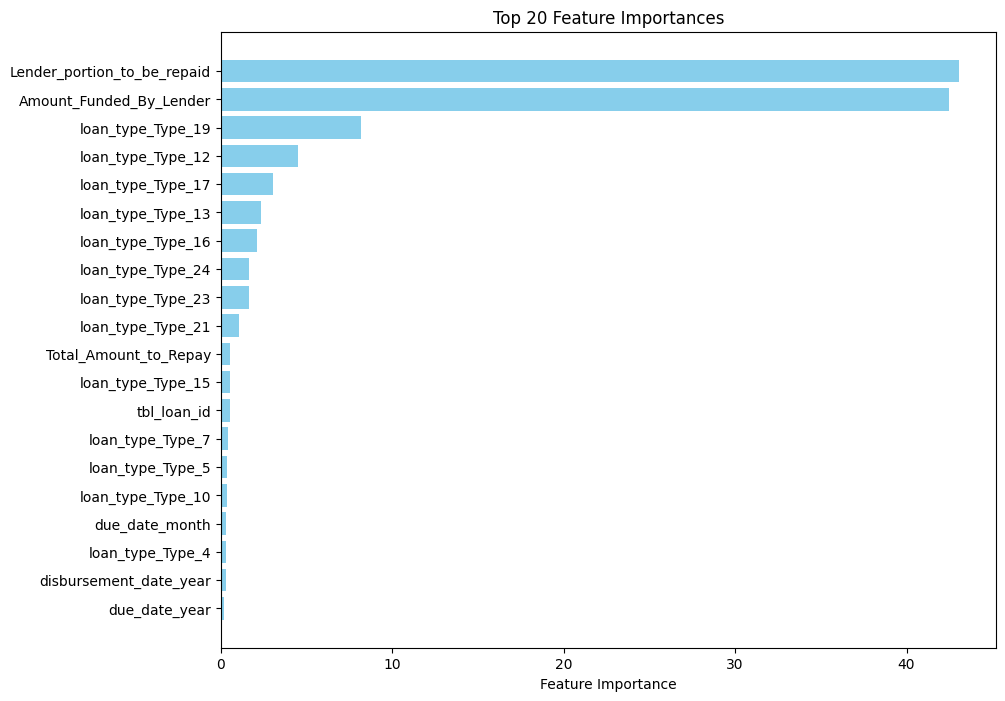

In [58]:
# Feature Importance

# Get the absolute values of the coefficients
feature_importances = np.abs(clf.coef_).flatten()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features_for_modelling,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.show()

## Model Prediction & Inference

In [59]:
# Make predictions on the test dataset
test_predictions = clf.predict(test_df[features_for_modelling])
test_predictions_proba = clf.predict_proba(test_df[features_for_modelling])[:, 1]

# Save the predictions to a CSV file

test_df['target'] = test_predictions
sub =  test_df[['ID', 'target']]
sub.head()


,ID,target
68654,ID_269404226088267278,0
68655,ID_255356300042267278,0
68656,ID_257026243764267278,0
68657,ID_264617299409267278,0
68658,ID_247613296713267278,0


###Feature engineering

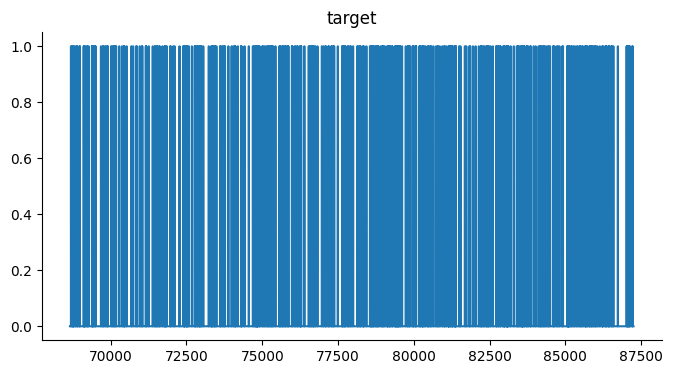

In [61]:
from matplotlib import pyplot as plt
sub['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

In [64]:
from sklearn.impute import SimpleImputer
# Select numerical features to create polynomial features from
numerical_features_for_poly = ['Total_Amount', 'duration']

# Create an imputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the selected numerical features in the train data
train[numerical_features_for_poly] = imputer.fit_transform(train[numerical_features_for_poly])

# Transform the test data using the fitted imputer
test[numerical_features_for_poly] = imputer.transform(test[numerical_features_for_poly])

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features_train = poly.fit_transform(train[numerical_features_for_poly])
poly_features_test = poly.transform(test[numerical_features_for_poly])

In [81]:
# prompt: Creating features based on date/time information (e.g., day of the week, month) and show results

# Create features based on date/time information
for col in ['disbursement_date', 'due_date']:
  # Day of the week (0: Monday, 6: Sunday)
  train_df[col + '_dayofweek'] = train_df[col].dt.dayofweek
  test_df[col + '_dayofweek'] = test_df[col].dt.dayofweek

  # Month (1: January, 12: December)
  train_df[col + '_month'] = train_df[col].dt.month
  test_df[col + '_month'] = test_df[col].dt.month

  # Quarter (1-4)
  train_df[col + '_quarter'] = train_df[col].dt.quarter
  test_df[col + '_quarter'] = test_df[col].dt.quarter


# Update features for modeling (include new features)
features_for_modelling = [col for col in train_df.columns if col not in date_cols + ['ID', 'target', 'country_id']]

# Show results of the new features (example: first few rows)
print(train_df[['disbursement_date_dayofweek', 'disbursement_date_month', 'disbursement_date_quarter']].head())


   disbursement_date_dayofweek  disbursement_date_month  \
0                            1                        8   
1                            5                        7   
2                            4                        9   
3                            3                       10   
4                            0                       11   

   disbursement_date_quarter  
0                          3  
1                          3  
2                          3  
3                          4  
4                          4  


In [91]:
train['target'].value_counts()

,count
target,
0.0,32138
1.0,631


In [ ]:
sub.to_csv('baseline_submission.csv', index=False)